# 2D Inflow Capture vs Inelt with Depth Curve

2D inflow is the preferred way of connecting 1D manhole to 2D surface, which uses the equation of the following form,

- Q = 13.382*Depth^0.5
- It can be set for all nodes at the 2D settings
- It can be overwritten at individual node


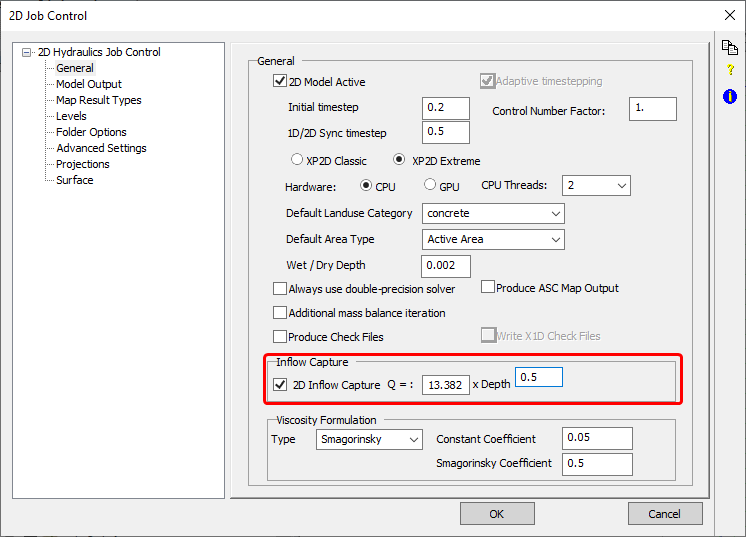

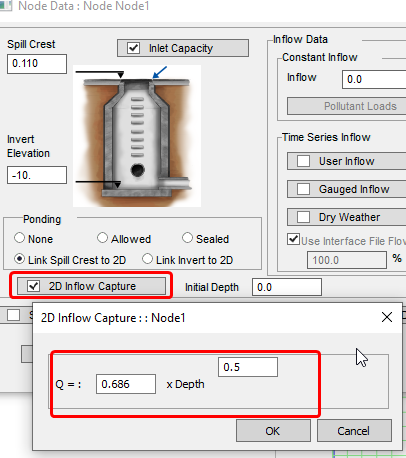

## Inlet Setting

Alternatively, I can also use the "inlet capacity" by supplying a custom curve.

In theory, if I use the same formula to create the depth curve, it should generate the same results as using "the 2D inflow capture" option.

And that is what I am going to test here. Because I have a feeling the "2D inflow capture" does some other extra stuff to make the model more stable, rather than blindly following the curve.

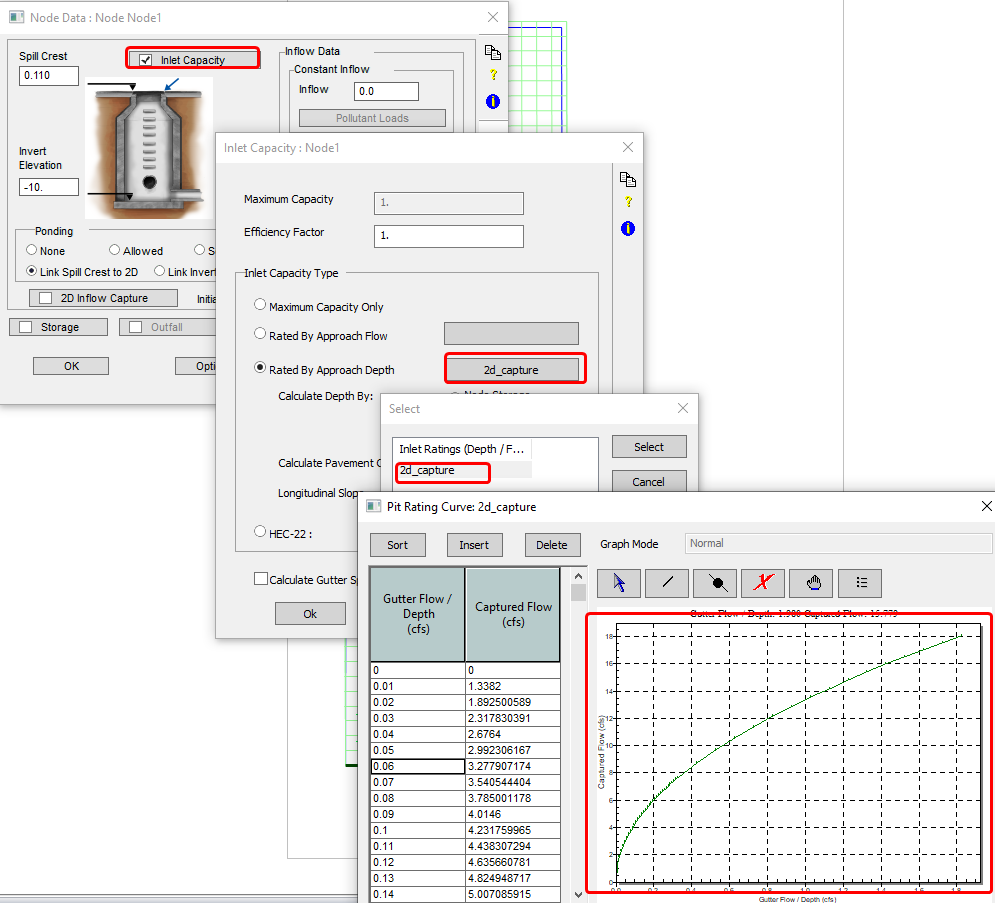

In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib widget

In [26]:
ws = r'C:\Users\Mel.Meng\Documents\GitHub\xpswmm\models\1d2d\data'

# for inlet modeled as storage flow = (stage@ts2- stage@ts1)*area/ts
area = 10000 # storage constant area in ft2
ts = 60.0 # time step in sec
rim = 0.0278 # rim elevation in ft

excel_path = os.path.join(ws, '2d inflow capture vs 1d inlet depth.xlsx')
df = pd.read_excel(excel_path, 'Sheet1')

for fld in df.columns:
    if 'ws_' in fld: # convert water surface as depth above rim
        df[fld] = df[fld] - rim
    if 'stage_' in fld: # calculate flow rates from stage
        sc = fld.replace('stage_', '')
        df['flow_%s' % sc] = df[fld].diff()*area/ts      

df = df[df['min'] < 170]

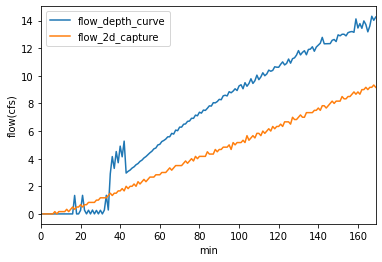

In [27]:

scenarios = ['depth_curve', '2d_capture']
ax = df.loc[:, ['flow_%s' % x for x in scenarios]].plot()
ax.set_xlabel('min')
ax.set_ylabel('flow(cfs)')
# ax.set_ylim(0, 20)
plt.show()

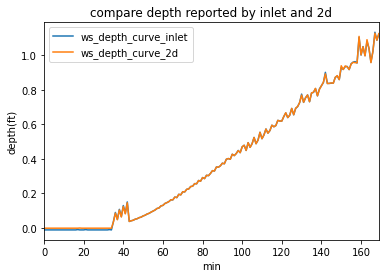

In [28]:

ax = df.loc[:, ['ws_depth_curve_inlet', 'ws_depth_curve_2d']].plot()
ax.set_xlabel('min')
ax.set_ylabel('depth(ft)')
# ax.set_ylim(0, 20)
ax.set_title('compare depth reported by inlet and 2d')
plt.show()

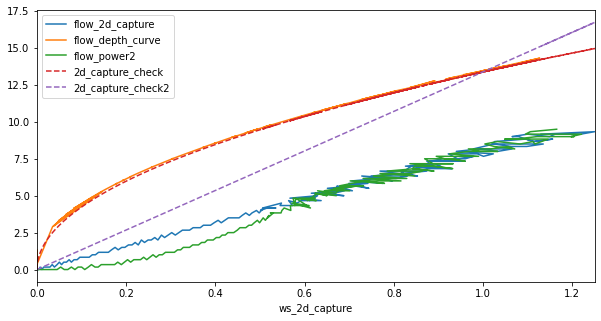

In [30]:
import numpy as np
ax = None
df.loc[df['ws_2d_capture']<0, 'ws_2d_capture'] = 0
df['2d_capture_check'] = np.power(df['ws_2d_capture'], 0.5)*13.382
df['2d_capture_check2'] = df['ws_2d_capture']*13.382


ax = df.plot(x='ws_%s' % '2d_capture', y='flow_%s' % '2d_capture', figsize=(10, 5))
df.plot(x='ws_depth_curve_2d', y='flow_depth_curve', ax=ax)
df.plot(x='ws_power2', y='flow_power2', ax=ax)
df.plot(x='ws_2d_capture', y='2d_capture_check', style='--', ax=ax)
df.plot(x='ws_2d_capture', y='2d_capture_check2', style='--', ax=ax)
# ax.set_ylim(0, 12.5)
plt.show()

In [23]:
(df['flow_2d_capture']/df['ws_2d_capture']).median()

7.928004494269128

using 2d classic in 2019.1.2 seems to show difference. However in 2019.1.3, using extreme seems to show no different between many of the settings.

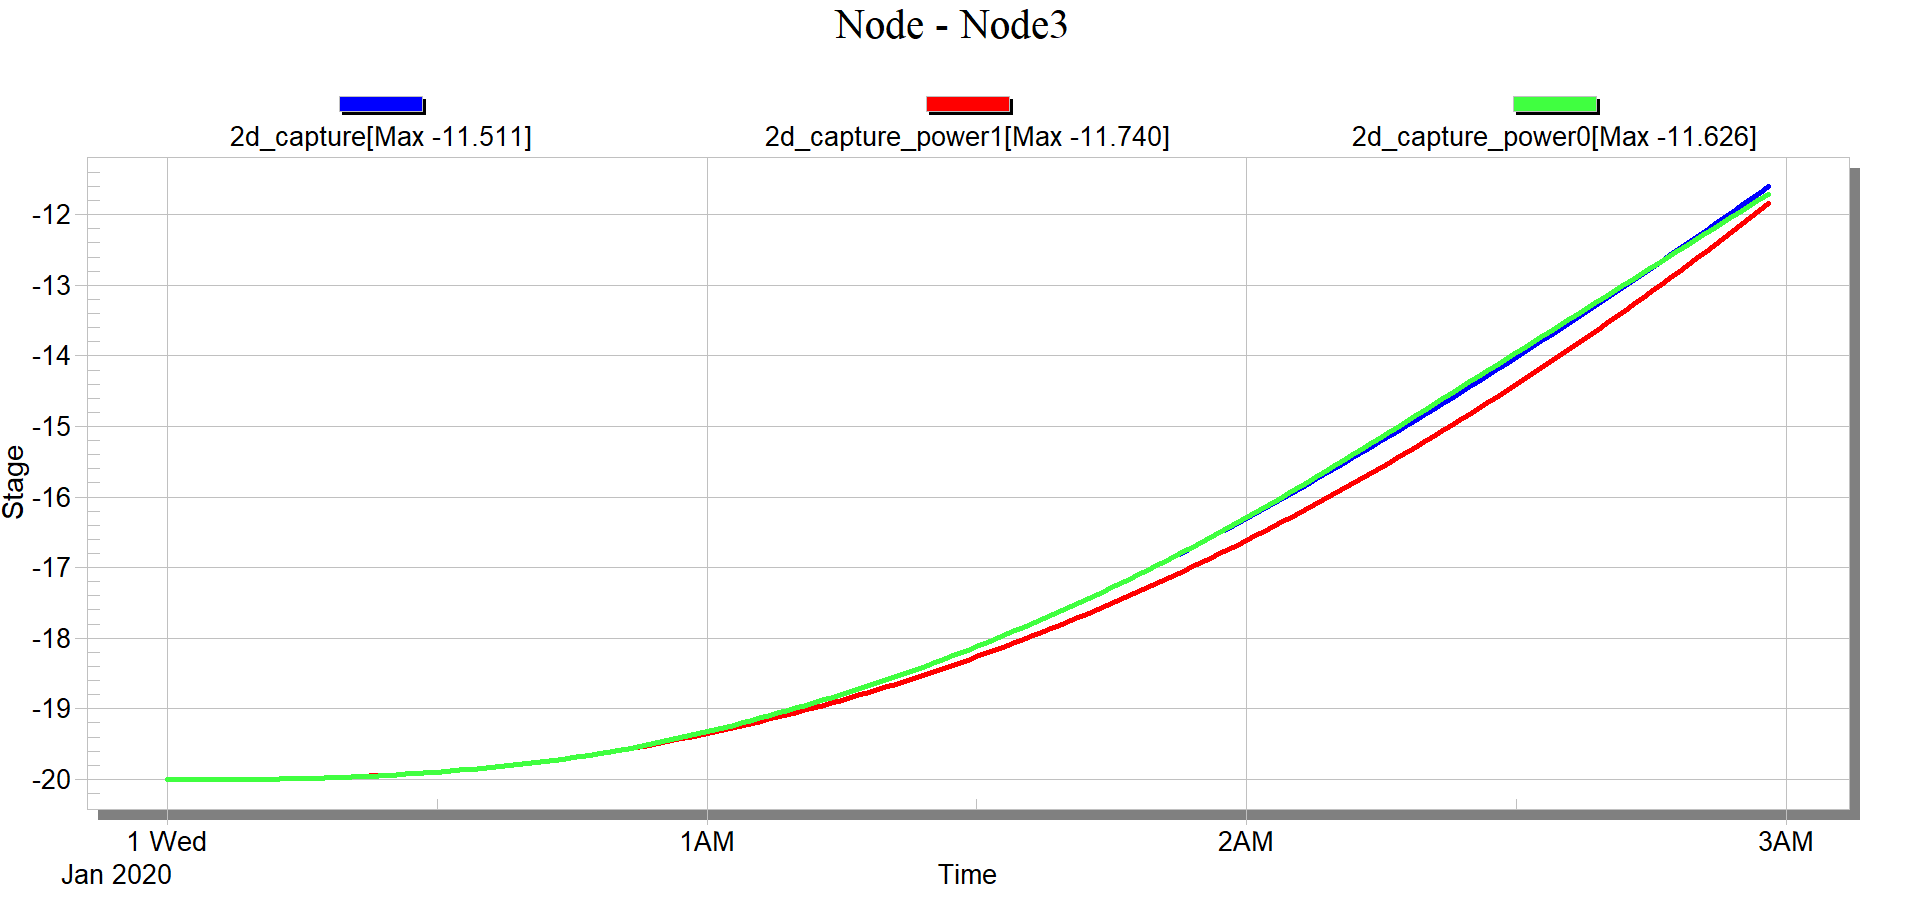

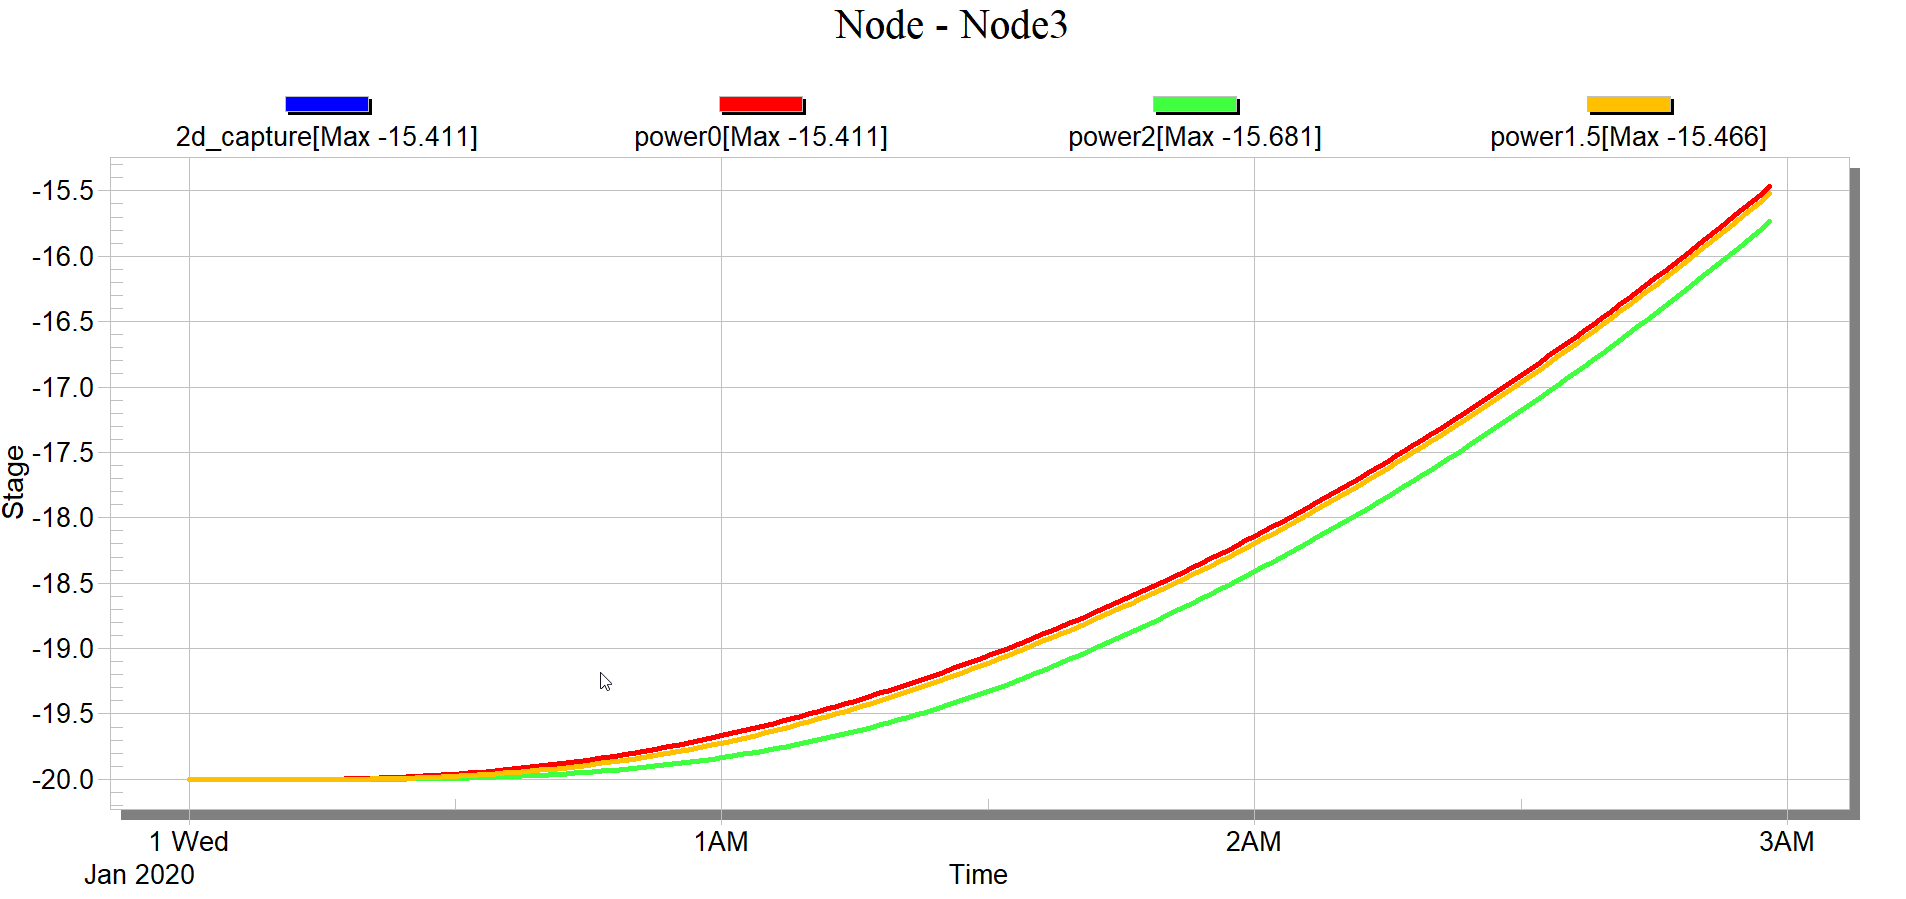